In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv('smartphones.csv')

In [3]:
df['price'] = df['price'] / 100

In [4]:
df.head(n=5)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,389.99,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),469.99,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,1099.00,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,519.99,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),559.99,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    float64
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [6]:
sum(df.duplicated())

0

In [7]:
df.nunique()

brand_name                    46
model                        980
price                        379
avg_rating                    30
5G_or_not                      2
processor_brand               13
num_cores                      3
processor_speed               35
battery_capacity              89
fast_charging_available        2
fast_charging                 32
ram_capacity                   9
internal_memory                8
screen_size                   79
refresh_rate                   6
num_rear_cameras               4
os                             3
primary_camera_rear           18
primary_camera_front          19
extended_memory_available      2
resolution_height             65
resolution_width              40
dtype: int64

In [8]:
df_mean_pop = df.groupby( ['brand_name'])['price'].mean().to_frame(name = 'price')#.reset_index()
df_mean_pop.sort_values(['price'], ascending=False).head(n=10)

,price
brand_name,
vertu,6500.000000
royole,1299.990000
leitz,1249.900000
apple,959.665217
huawei,801.772500
asus,747.094286
tesla,699.990000
lg,633.293333
sony,605.706667


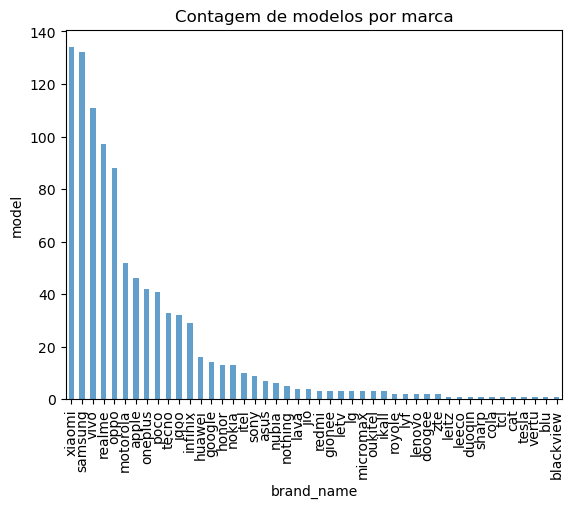

In [9]:
df['brand_name'].value_counts().plot(kind='bar', title='Contagem de modelos por marca', alpha=.7)
plt.xlabel('brand_name', fontsize=10)
plt.ylabel('model', fontsize=10);

In [10]:
ram = df.groupby( ['ram_capacity'])['brand_name'].count().to_frame(name = 'brand_name')#.reset_index()
ram.sort_values(['brand_name'], ascending=False).head(n=10)

,brand_name
ram_capacity,
8,339
6,234
4,217
12,86
3,54
2,32
16,9
1,7
18,2


# Distribuição de Avaliações Médias #
# Distribution of Average Ratings #

In [11]:
# Configurações visuais
# Visual setting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

<Figure size 1000x600 with 0 Axes>

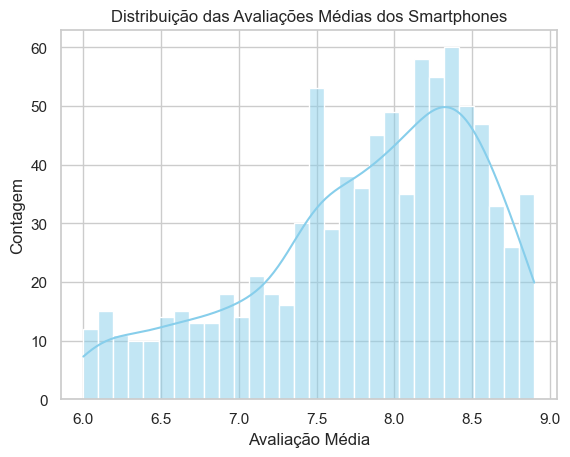

In [12]:
# Cria o histograma das avaliações médias
# Creates the histogram of the average ratings
sns.histplot(df['avg_rating'], bins=30, kde=True, color='skyblue')

# Adiciona rótulos e título
# Add labels and title
plt.xlabel('Avaliação Média')
plt.ylabel('Contagem')
plt.title('Distribuição das Avaliações Médias dos Smartphones')

plt.show()

# Contagem de Smartphones 5G vs. Não 5G #
# Count of 5G vs. non-5G smartphones #

In [13]:
# Contagem de smartphones 5G e não 5G
# Count of 5G and non-5G smartphones
count_5g = df['5G_or_not'].sum()
count_non_5g = len(df) - count_5g

In [14]:
# Rótulos e valores para o gráfico de pizza
# Criação do gráfico de pizza
labels = ['5G', 'Não 5G']
sizes = [count_5g, count_non_5g]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explodir a fatia "5G" para destacá-la


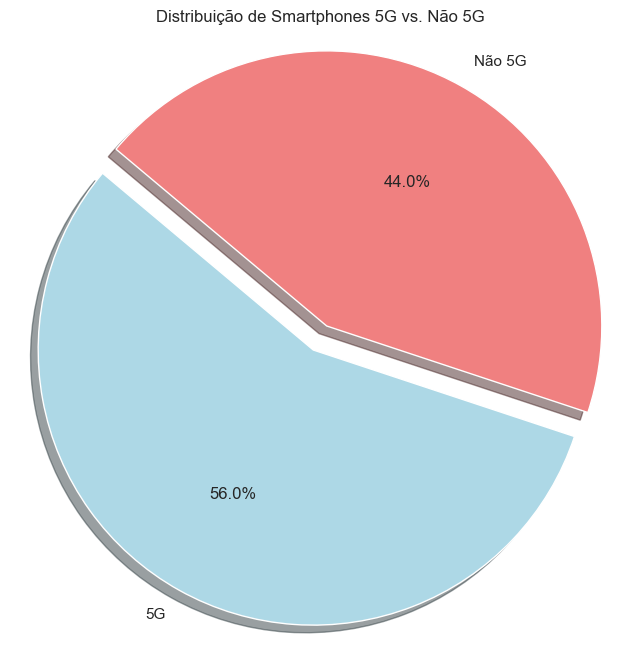

In [15]:
# Criação do gráfico de pizza
# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribuição de Smartphones 5G vs. Não 5G')
plt.axis('equal')  # Assegura que o gráfico de pizza seja uma forma de círculo

plt.show()

In [16]:
# Crie um DataFrame que contenha a contagem de smartphones 5G e não 5G por marca
# Create a DataFrame containing the count of 5G and non-5G smartphones by brand
count_5g_by_brand = df.groupby(['brand_name', '5G_or_not'])['model'].count().reset_index()
count_5g_by_brand.columns = ['brand_name', '5G_or_not', 'count']


In [17]:
# Filtrar apenas os smartphones 5G (5G_or_not = 1)
# Filter only 5G smartphones (5G_or_not = 1)
count_5g_by_brand_5g = count_5g_by_brand[count_5g_by_brand['5G_or_not'] == 1]


In [18]:
# Filtrar apenas os smartphones não 5G (5G_or_not = 0)
# Filter only non-5G smartphones (5G_or_not = 0)
count_5g_by_brand_not_5g = count_5g_by_brand[count_5g_by_brand['5G_or_not'] == 0]


In [19]:
# Mesclar os dois DataFrames com base no nome da marca
# Merge the two DataFrames based on the brand name
merged_count_5g = count_5g_by_brand_5g.merge(count_5g_by_brand_not_5g, on='brand_name', suffixes=('_5g', '_not_5g'))


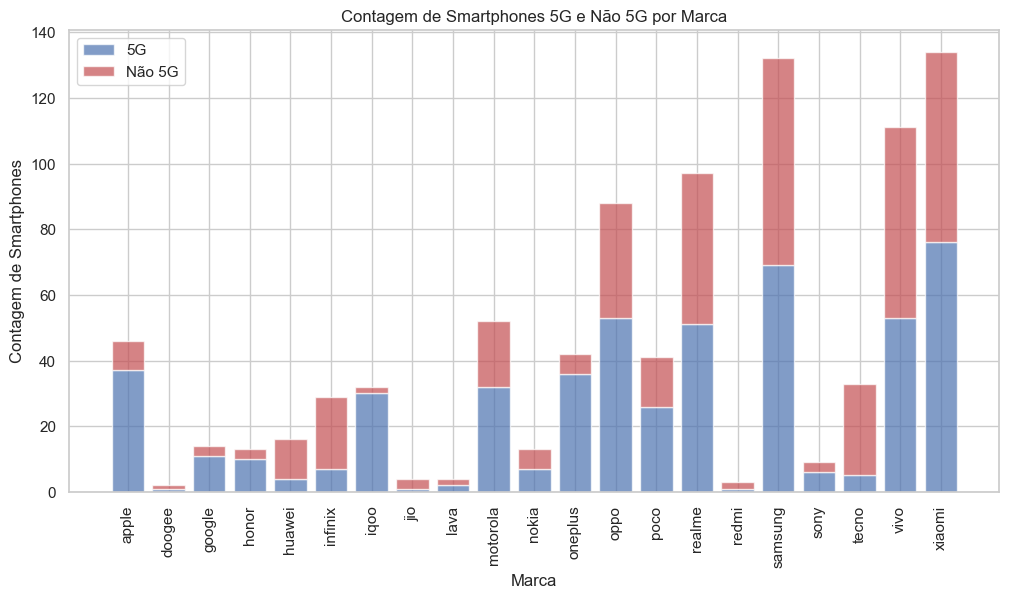

In [20]:
# Crie um gráfico de barras empilhadas
# Create a stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(merged_count_5g['brand_name'], merged_count_5g['count_5g'], label='5G', color='b', alpha=0.7)
plt.bar(merged_count_5g['brand_name'], merged_count_5g['count_not_5g'], bottom=merged_count_5g['count_5g'], label='Não 5G', color='r', alpha=0.7)
plt.xlabel('Marca')
plt.ylabel('Contagem de Smartphones')
plt.title('Contagem de Smartphones 5G e Não 5G por Marca')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [21]:
# Distribuição de Tamanho de Tela #  
# Screen Size Distribution #  

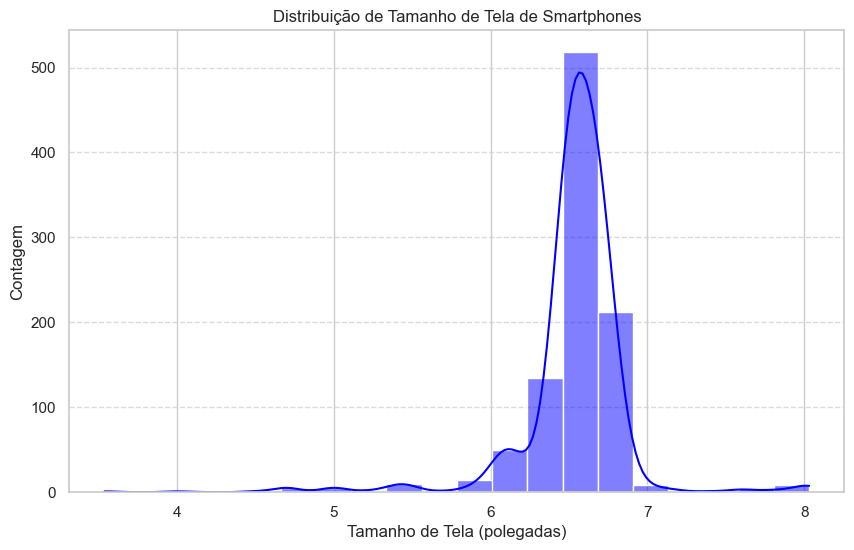

In [22]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.histplot(data=df, x='screen_size', bins=20, kde=True, color='blue')

plt.xlabel('Tamanho de Tela (polegadas)')  # Rótulo do eixo x
plt.ylabel('Contagem')  # Rótulo do eixo y
plt.title('Distribuição de Tamanho de Tela de Smartphones')  # Título do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Linhas de grade no eixo y

plt.show()

# Distribuição de Preços por Modelo #
# Price Distribution by Model #

In [23]:
modelos_por_marca = df.groupby('brand_name')['model'].nunique().reset_index()


In [24]:
modelos_por_marca = modelos_por_marca.sort_values(by='model', ascending=False)


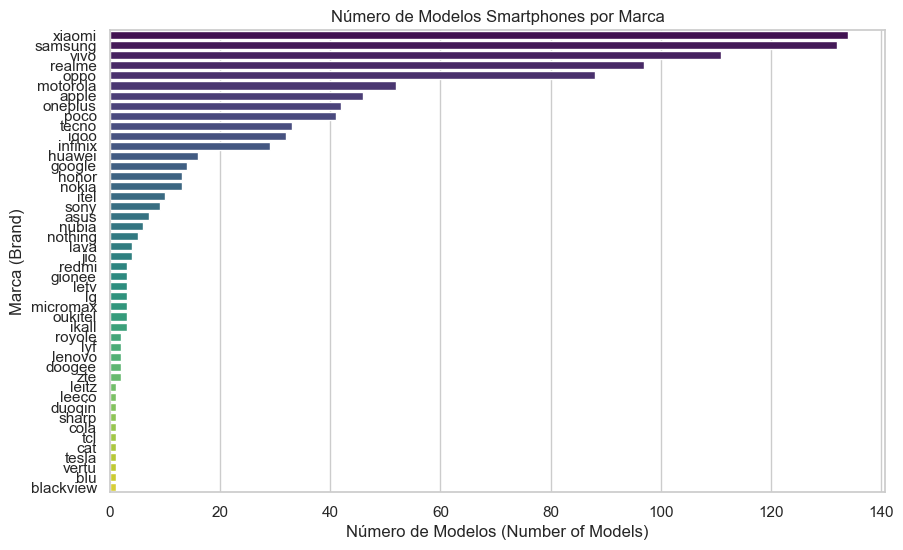

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=modelos_por_marca, y='brand_name', x='model', palette='viridis')

plt.xlabel('Número de Modelos (Number of Models)')
plt.ylabel('Marca (Brand)')
plt.title('Número de Modelos Smartphones por Marca')
plt.xticks(rotation=0)  # Rotação dos rótulos do eixo x (Rotation of x-axis labels)

  
plt.show()